<a href="https://colab.research.google.com/github/RaphaelSerrano12/Projetos-IA-Big-Data/blob/main/deteccao_de_placas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
!pip install pytesseract

In [ ]:
!mkdir tessdata

In [ ]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata

--2025-04-16 19:13:58--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata [following]
--2025-04-16 19:13:59--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15336931 (15M) [application/octet-stream]
Saving to: ‘./tessdata/por.traineddata’

./tessdata/por.trai 100%[===================>]  14.63M  60.3MB/s    in 0.2s    

2025-04-16 19:14:00 (60.3 MB/s) - ‘./tessdata/por.trainedd

In [ ]:
import cv2
import pytesseract

In [ ]:
imagem = cv2.imread('/content/trecho_livro.png')

In [ ]:
from google.colab.patches import cv2_imshow

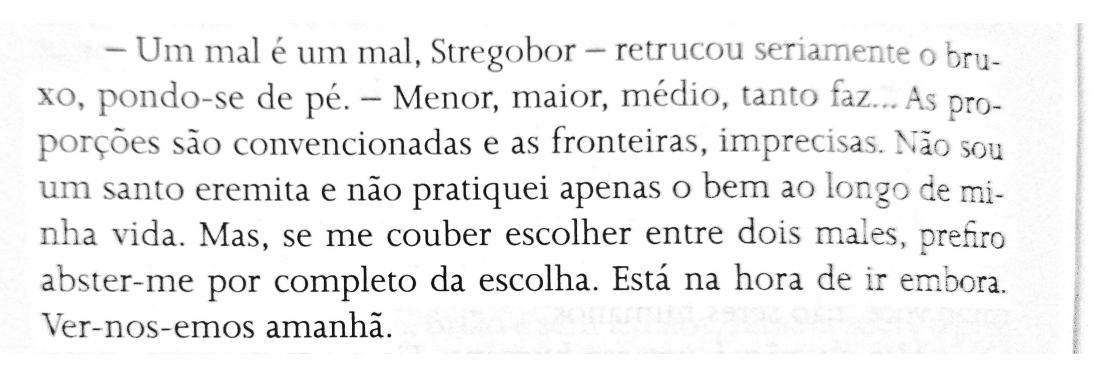

In [ ]:
cv2_imshow(imagem)

In [ ]:
texto = pytesseract.image_to_string(imagem)
print(imagem)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 6'

In [ ]:
texto = pytesseract.image_to_string(imagem, lang = 'por', config = config_tesseract)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bry-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... As pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. ;
Ver-nos-emos amanhã. |



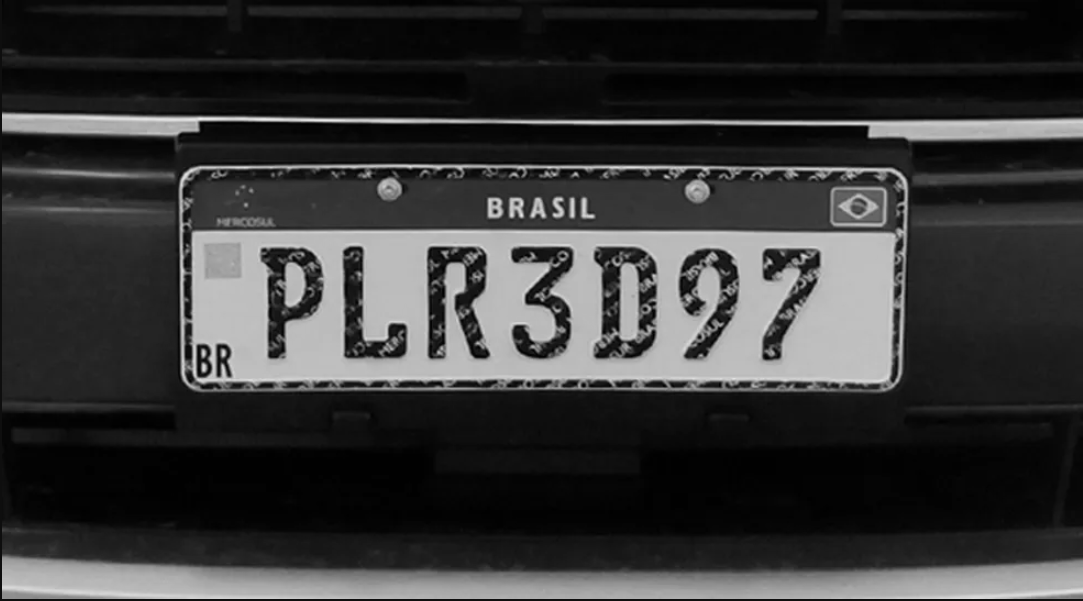

In [ ]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem)

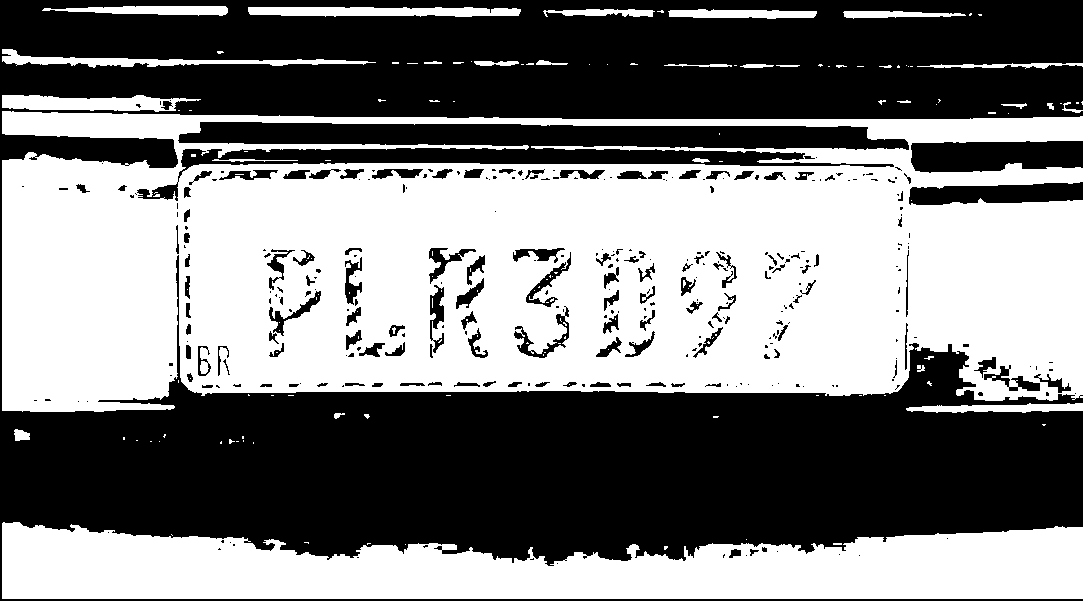

In [ ]:
limiar = 25
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

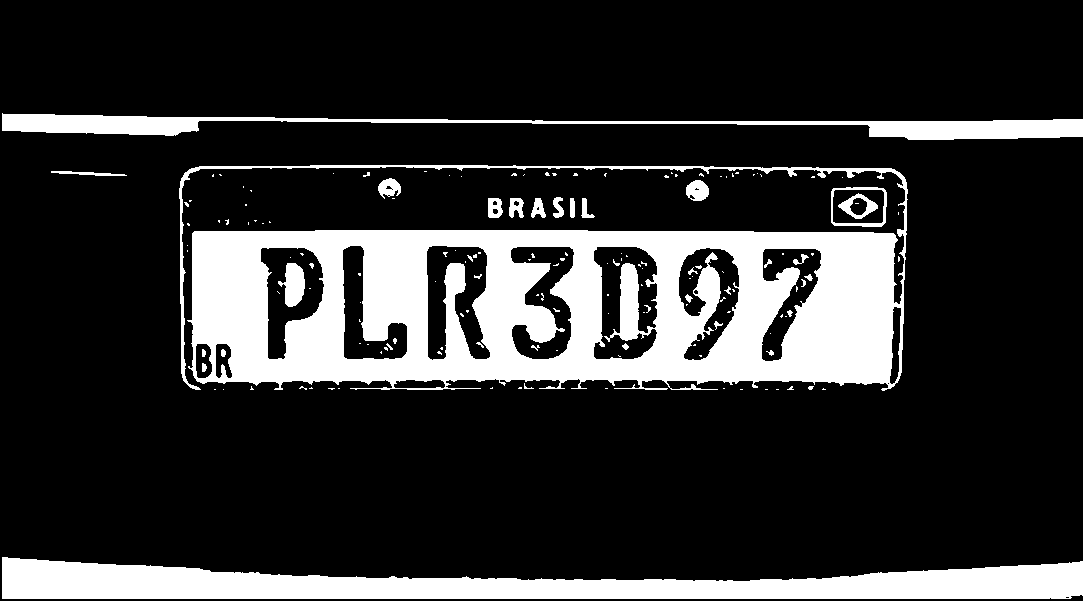

In [ ]:
limiar = 127
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

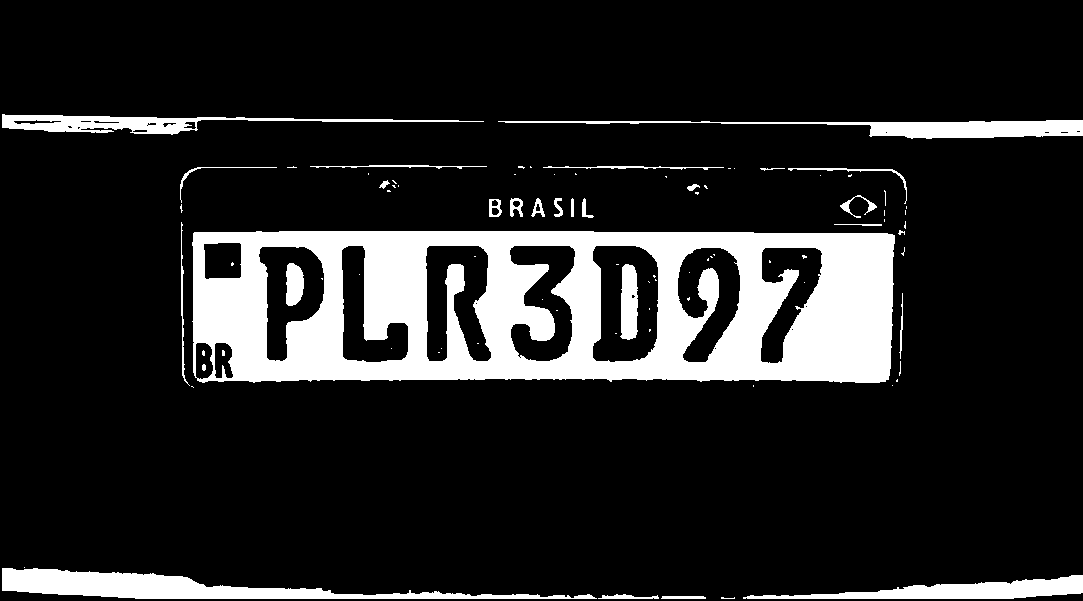

In [ ]:
limiar = 170
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

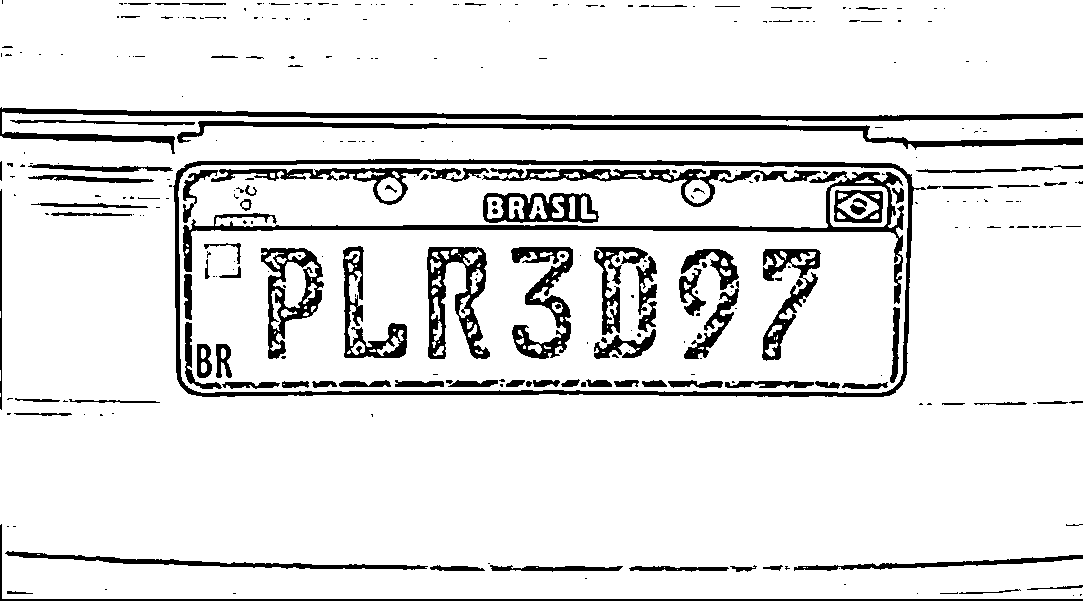

In [ ]:
lim_adapt = cv2.adaptiveThreshold(imagem, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
cv2_imshow(lim_adapt)

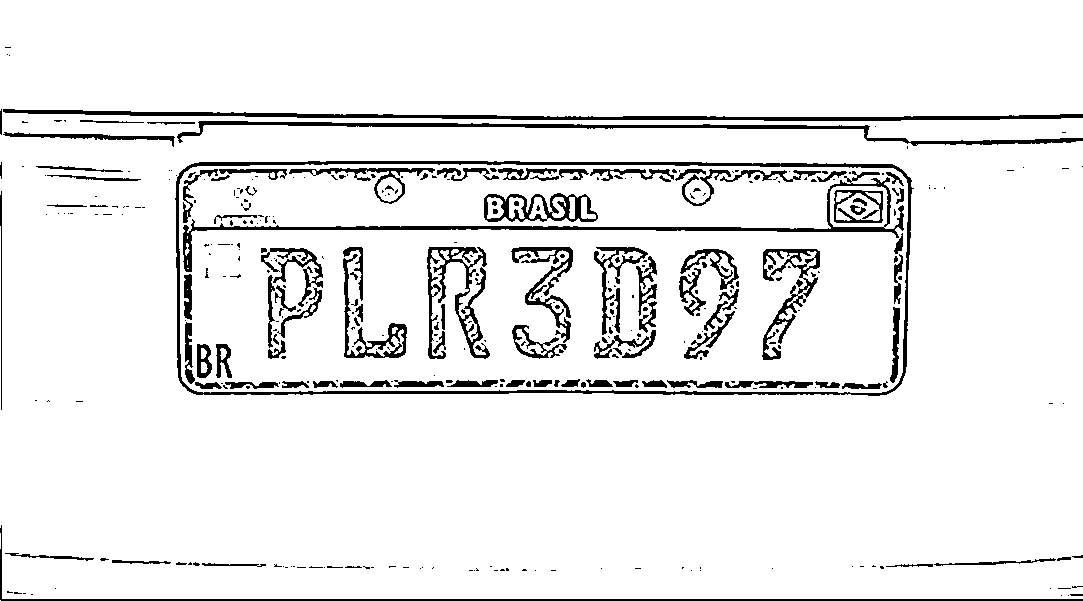

In [ ]:
lim_adapt = cv2.adaptiveThreshold(imagem, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
cv2_imshow(lim_adapt)

In [ ]:
imagem

array([[ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   3, ...,   5,   5,   5],
       ...,
       [ 14,  14, 144, ..., 122, 121, 120],
       [ 14,  14,  14, ...,  14,  14,  14],
       [ 14,  14,  14, ...,  14,  14,  14]], dtype=uint8)

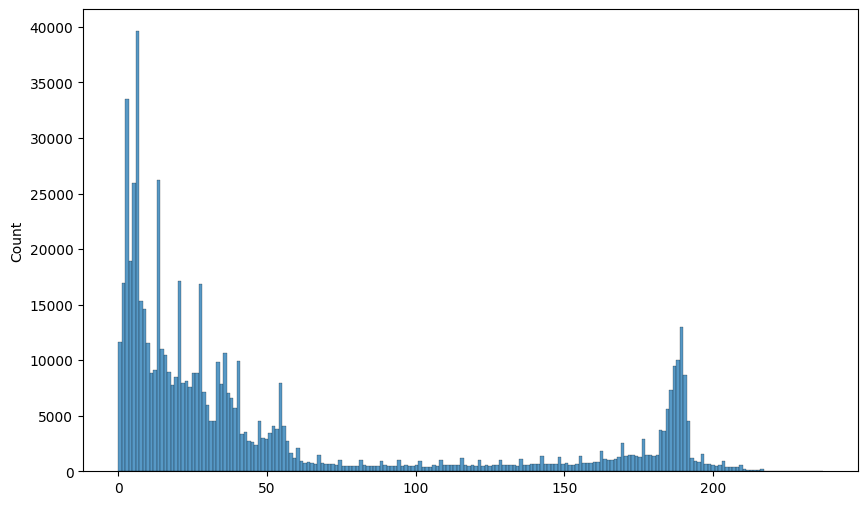

In [ ]:
import seaborn as sns
ax = sns.histplot(imagem.flatten())
ax.figure.set_size_inches(10,6)

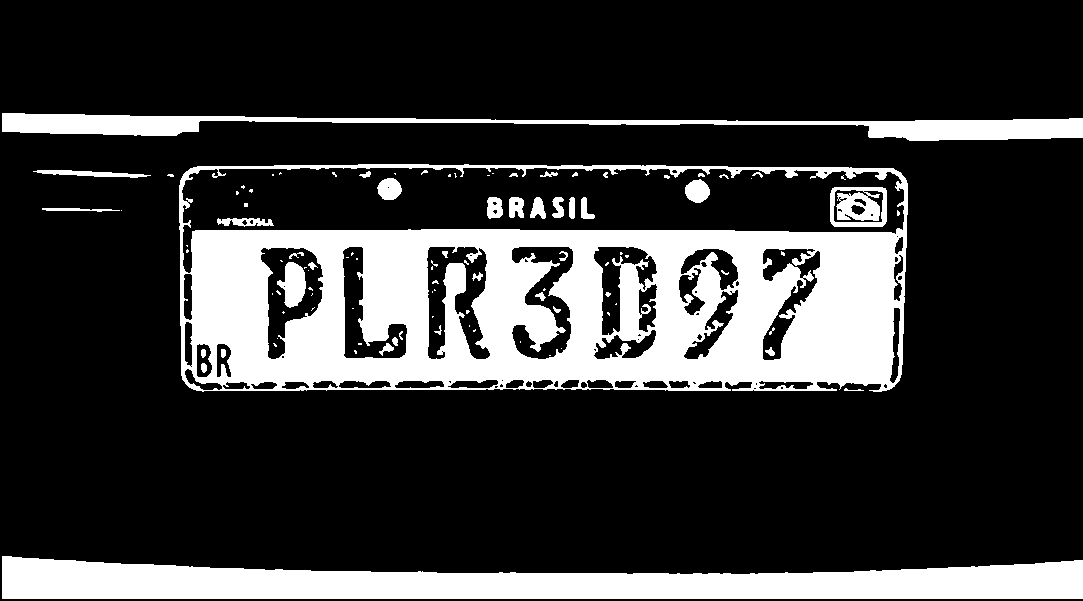

Limiar: 96.0


In [ ]:
valor, lim_otsu = cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(lim_otsu)
print(f'Limiar: {valor}')

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(lim_otsu, lang = 'por', config = config_tesseract)
print(texto)

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

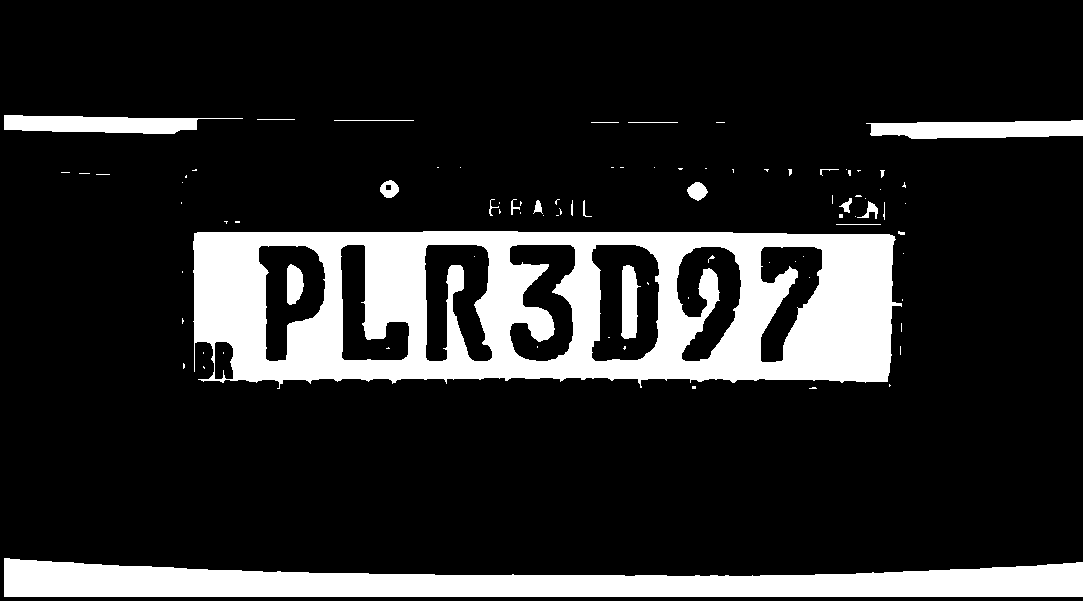

In [ ]:
erosao = cv2.erode(lim_otsu, kernel)
cv2_imshow(erosao)

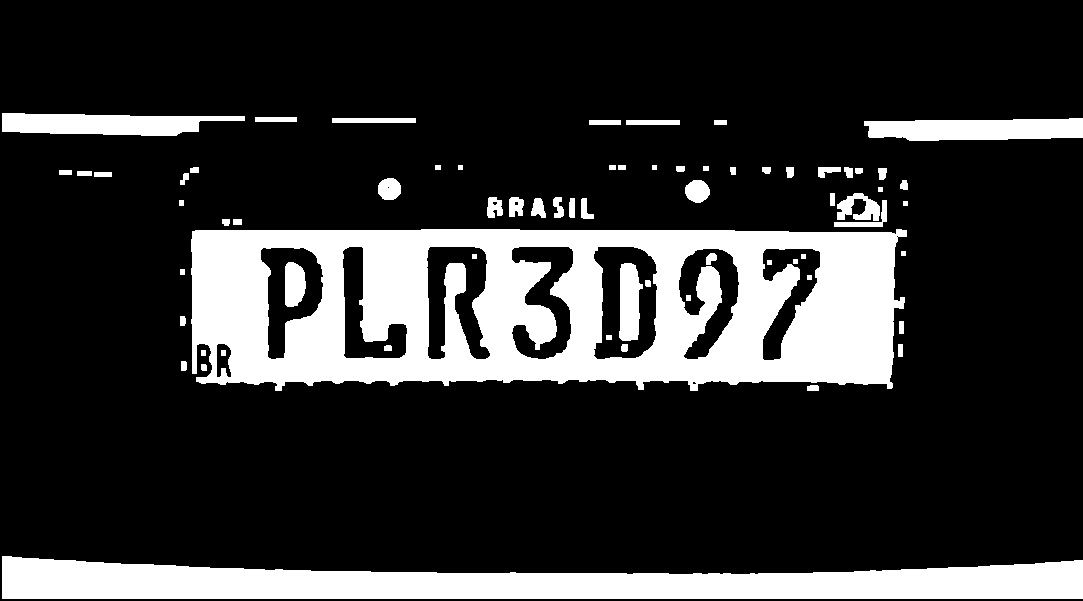

In [ ]:
abertura = cv2.morphologyEx(lim_otsu, cv2.MORPH_OPEN, kernel)
cv2_imshow(abertura)

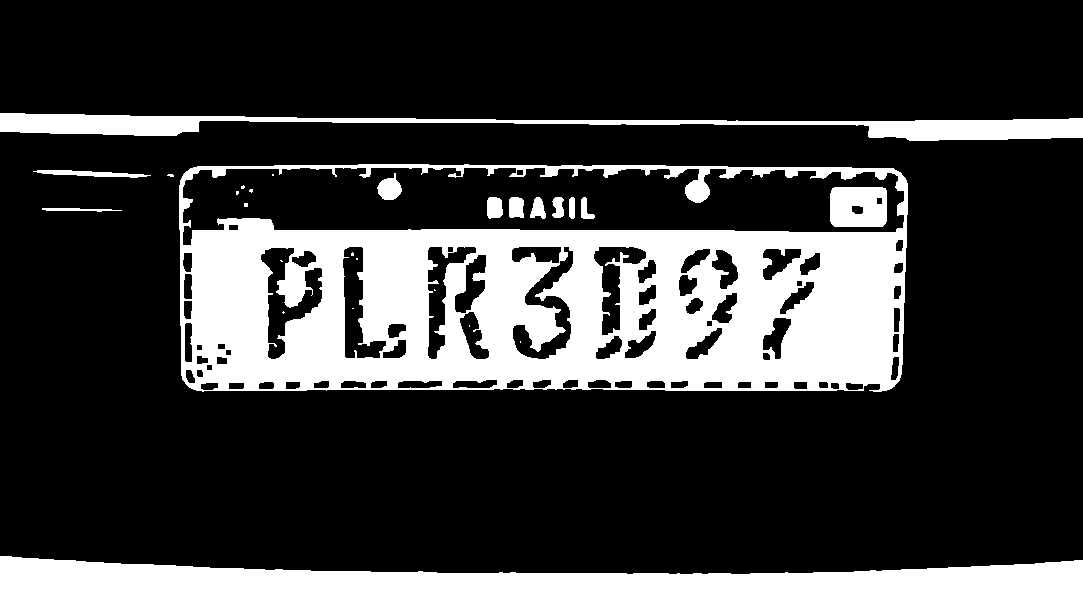

In [ ]:
fechamento = cv2.morphologyEx(lim_otsu, cv2.MORPH_CLOSE, kernel)
cv2_imshow(fechamento)

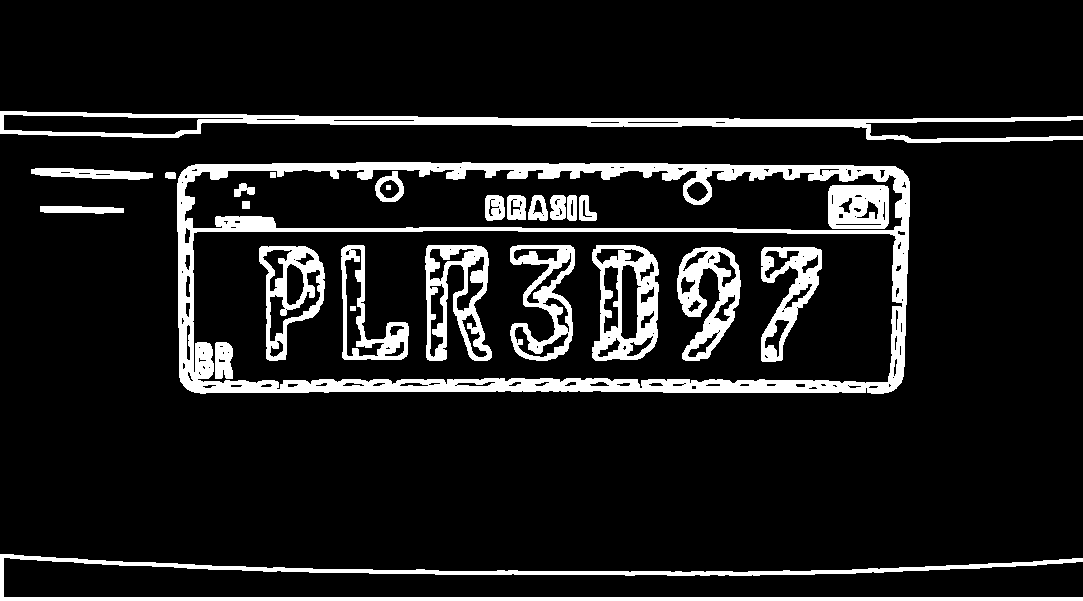

In [ ]:
gradiente = cv2.morphologyEx(lim_otsu, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(gradiente)

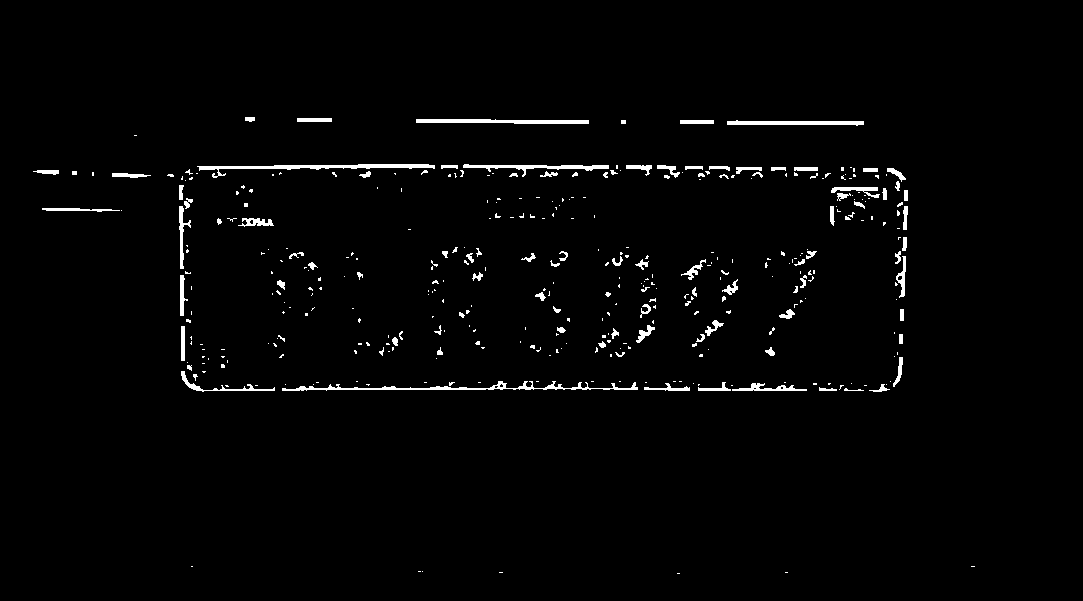

In [ ]:
cartola = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel)
cv2_imshow(cartola)

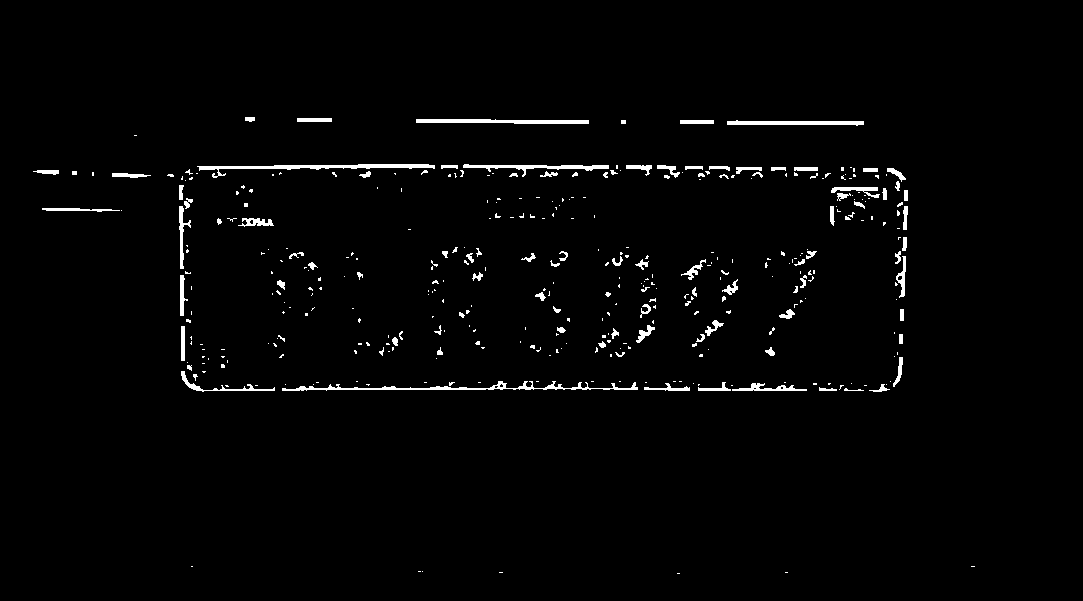

In [ ]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
kernel_circular = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
cv2_imshow(cartola)

In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang = 'por', config = config_tesseract)
print(texto)

, PLRSD97 |
— :” NS ss



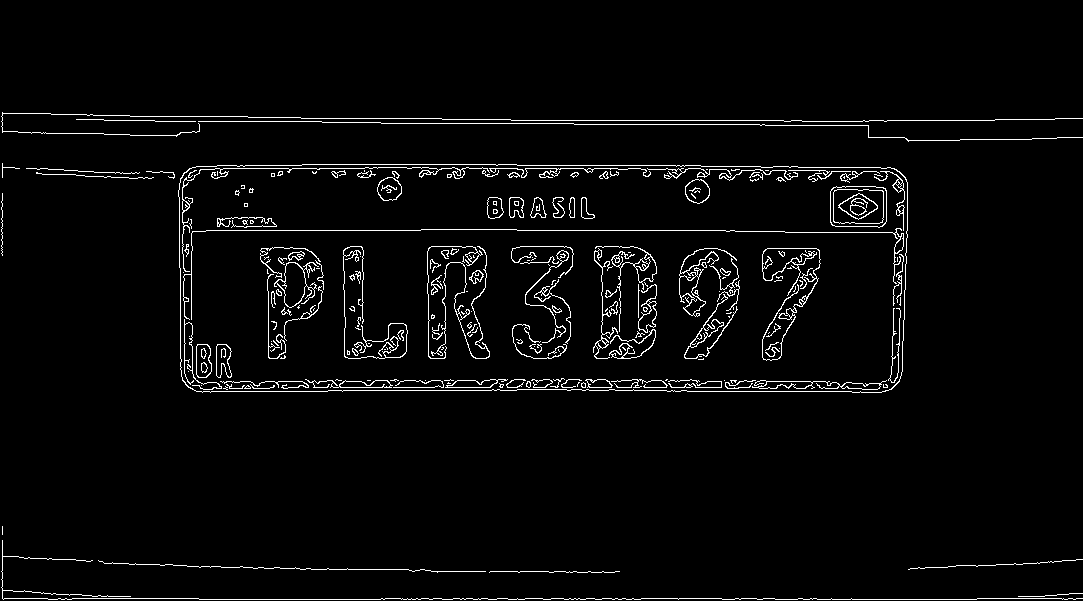

In [ ]:
bordas = cv2.Canny(imagem, 100, 200)
cv2_imshow(bordas)

In [ ]:
contornos, hierarquia =  cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
for contorno in contornos:
    epsilon = 0.02 * cv2.arcLength(contorno, True)
    aproximacao = cv2.approxPolyDP(contorno, epsilon, True)
    if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
        localizacao = aproximacao
        break


In [ ]:
localizacao

array([[[180, 178]],

       [[196, 391]],

       [[901, 375]],

       [[894, 168]]], dtype=int32)

In [ ]:
x, y, w, h = cv2.boundingRect(localizacao)

In [ ]:
x

180

In [ ]:
y

168

In [ ]:
w

722

In [ ]:
h

224

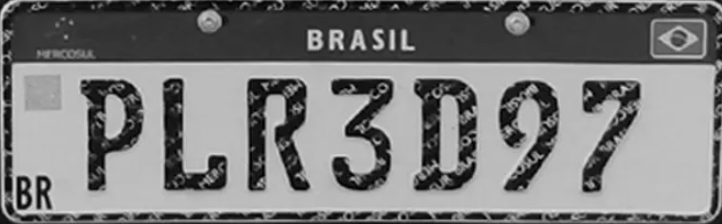

In [ ]:
placa = imagem[y:y+h, x:x+w]
cv2_imshow(placa)

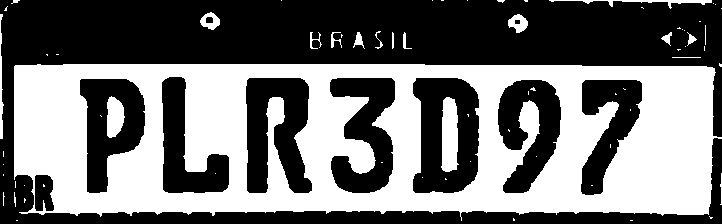

In [ ]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
erosao = cv2.erode(lim_otsu, cv2.getStructuringElement(cv2.MORPH_RECT, (4,4)))
cv2_imshow(erosao)


In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang = 'por', config = config_tesseract)
print(texto)

L PLR3D97



In [ ]:
import re
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
texto_extraido

<re.Match object; span=(2, 9), match='PLR3D97'>

In [ ]:
print(texto_extraido.group(0))

PLR3D97


In [ ]:
imagem = cv2.imread('/content/placa_carro2.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

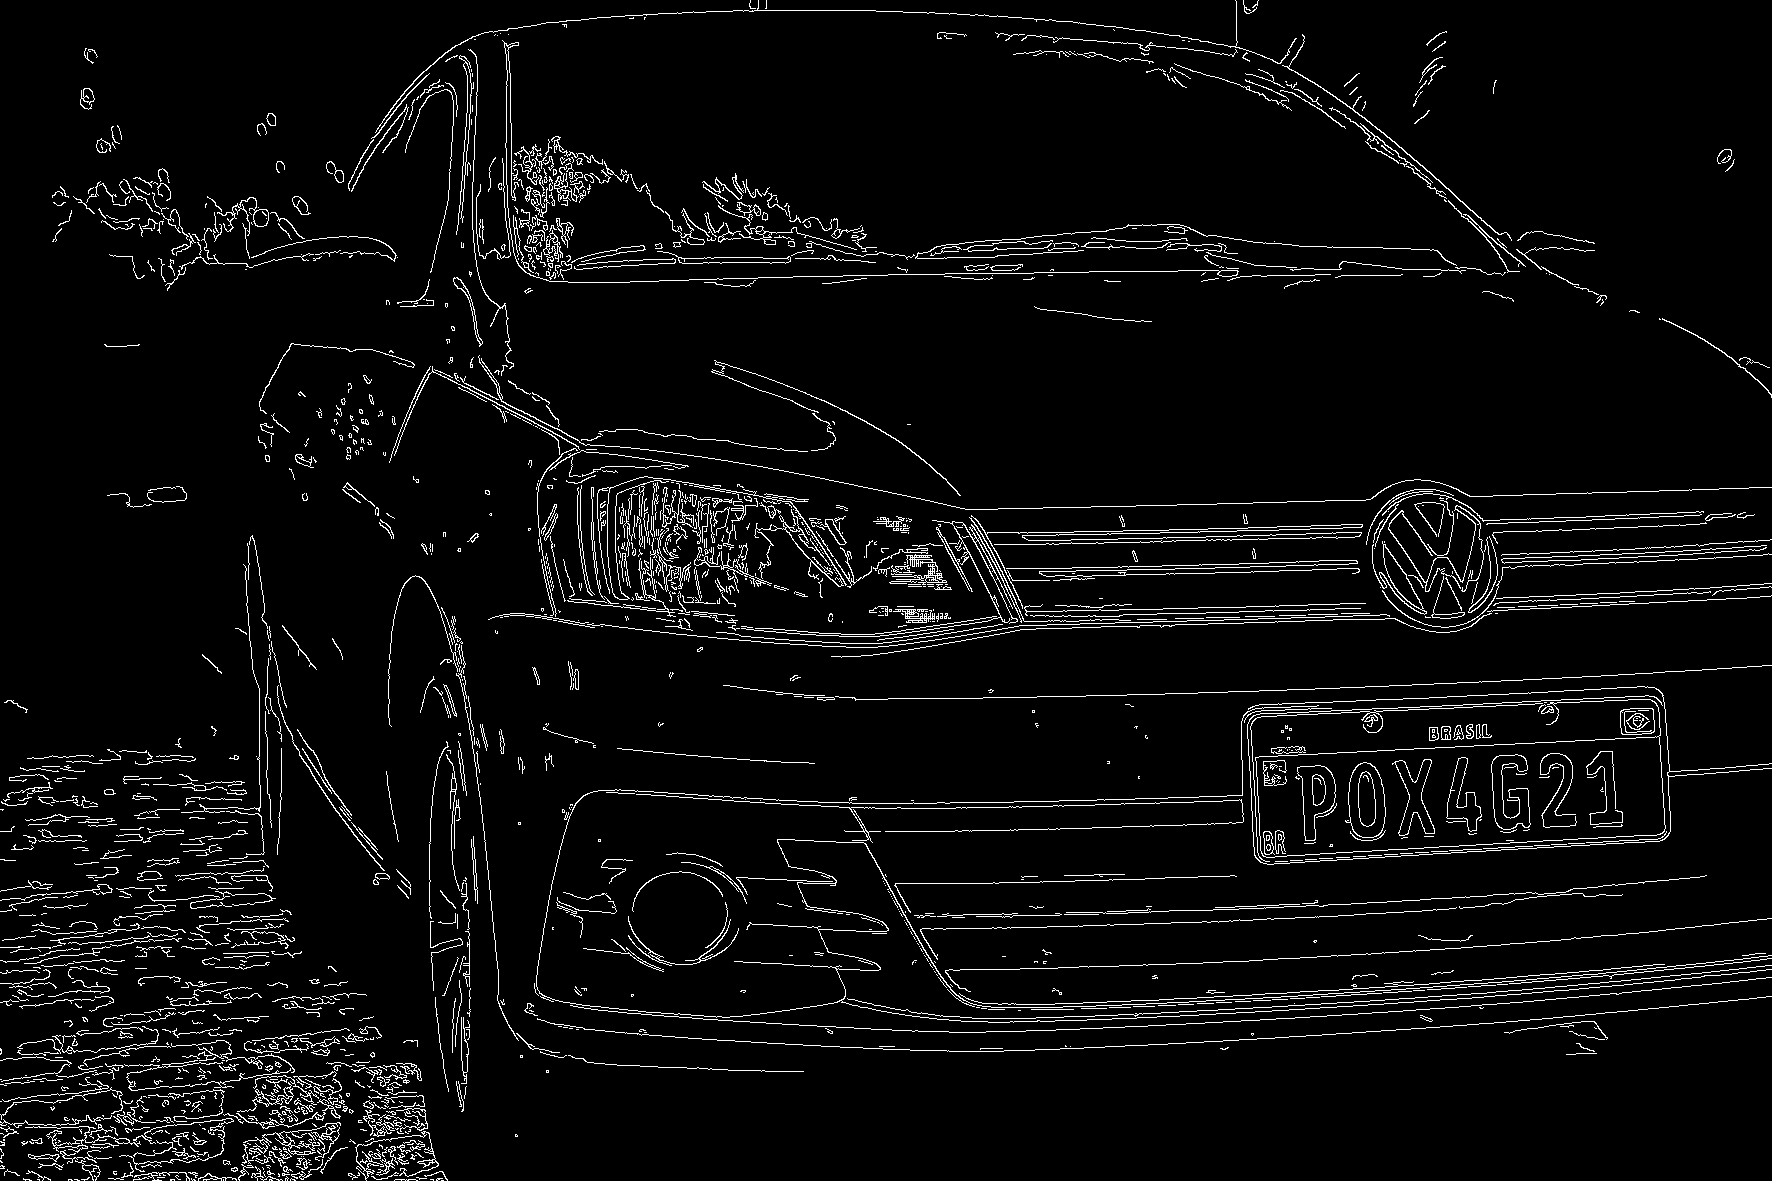

In [ ]:
bordas = cv2.Canny(imagem, 100, 200)
cv2_imshow(bordas)

In [ ]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = sorted(contornos, key = cv2.contourArea, reverse = True)[:10]

In [ ]:
contornos

[array([[[1628,  699]],
 
        [[1627,  700]],
 
        [[1604,  700]],
 
        [[1603,  701]],
 
        [[1580,  701]],
 
        [[1579,  702]],
 
        [[1557,  702]],
 
        [[1556,  703]],
 
        [[1554,  703]],
 
        [[1553,  702]],
 
        [[1550,  702]],
 
        [[1550,  703]],
 
        [[1549,  704]],
 
        [[1547,  704]],
 
        [[1549,  704]],
 
        [[1550,  703]],
 
        [[1552,  703]],
 
        [[1556,  707]],
 
        [[1556,  708]],
 
        [[1558,  710]],
 
        [[1558,  712]],
 
        [[1557,  713]],
 
        [[1558,  714]],
 
        [[1558,  715]],
 
        [[1557,  716]],
 
        [[1557,  717]],
 
        [[1556,  718]],
 
        [[1556,  719]],
 
        [[1554,  721]],
 
        [[1553,  721]],
 
        [[1550,  724]],
 
        [[1546,  724]],
 
        [[1550,  724]],
 
        [[1551,  723]],
 
        [[1552,  723]],
 
        [[1554,  721]],
 
        [[1555,  721]],
 
        [[1556,  720]],
 
        [[15

In [ ]:
for contorno in contornos:
    epsilon = 0.02 * cv2.arcLength(contorno, True)
    aproximacao = cv2.approxPolyDP(contorno, epsilon, True)
    if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
        localizacao = aproximacao
        break

In [ ]:
localizacao

array([[[1659,  737]],

       [[1656,  835]],

       [[1260,  850]],

       [[1259,  756]]], dtype=int32)

In [ ]:
x, y, w, h = cv2.boundingRect(localizacao)

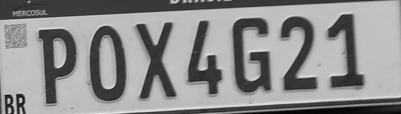

In [ ]:
placa = imagem[y:y+h, x:x+w]
cv2_imshow(placa)

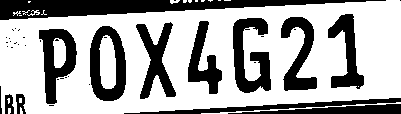

In [ ]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(lim_otsu)

In [ ]:
texto = pytesseract.image_to_string(lim_otsu, lang = 'por', config = config_tesseract)
print(texto)

“POX4G21



In [ ]:
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
texto_extraido

<re.Match object; span=(1, 8), match='POX4G21'>

In [ ]:
print(texto_extraido.group(0))

POX4G21
